In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set options to see all columns
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display the first 5 rows to see what we're working with
df.head()

,timestamp,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_forecast,price_actual
0,2015-01-01 00:00:00+01:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,50.10,65.41
1,2015-01-01 01:00:00+01:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,48.10,64.92
2,2015-01-01 02:00:00+01:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,47.33,64.48
3,2015-01-01 03:00:00+01:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,42.27,59.32
4,2015-01-01 04:00:00+01:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,38.41,56.04


In [4]:
# Get a summary of all columns, data types, and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   35064 non-null  object 
 1   generation_biomass          35064 non-null  int64  
 2   generation_lignite_coal     35064 non-null  int64  
 3   generation_coal_gas         35064 non-null  int64  
 4   generation_natural_gas      35064 non-null  int64  
 5   generation_hard_coal        35064 non-null  int64  
 6   generation_oil              35064 non-null  int64  
 7   generation_oil_shale        35064 non-null  int64  
 8   generation_peat             35064 non-null  int64  
 9   generation_geothermal       35064 non-null  int64  
 10  generation_hydro_pump_used  35064 non-null  int64  
 11  generation_hydro_river      35064 non-null  int64  
 12  generation_hydro_reservoir  35064 non-null  int64  
 13  generation_marine           350

In [5]:
# 1. Convert the 'timestamp' column to a proper datetime, standardizing to UTC timezone
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

# 2. Set the 'timestamp' as the index for our time-series data
df.set_index('timestamp', inplace=True)

# 3. Display the data again to see the new index
df.head()


,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_forecast,price_actual
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,50.10,65.41
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,48.10,64.92
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,47.33,64.48
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,42.27,59.32
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,38.41,56.04


In [6]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# We will use forward fill (ffill) to fill in any missing data points
df_cleaned = df.ffill()

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

Missing values before cleaning:
generation_biomass            0
generation_lignite_coal       0
generation_coal_gas           0
generation_natural_gas        0
generation_hard_coal          0
generation_oil                0
generation_oil_shale          0
generation_peat               0
generation_geothermal         0
generation_hydro_pump_used    0
generation_hydro_river        0
generation_hydro_reservoir    0
generation_marine             0
generation_nuclear            0
generation_other              0
generation_other_renewable    0
generation_solar              0
generation_waste              0
generation_wind_offshore      0
generation_wind_onshore       0
solar_forecast                0
wind_onshore_forecast         0
load_forecast                 0
load_actual                   0
price_forecast                0
price_actual                  0
dtype: int64

Missing values after cleaning:
generation_biomass            0
generation_lignite_coal       0
generation_coal_gas        

In [7]:
# Make a copy to keep our original data safe
df_cleaned = df_cleaned.copy()

# We drop 'price_forecast' because it would leak information to our model
df_cleaned = df_cleaned.drop(columns=['price_forecast'])

print("Dropped 'price_forecast'. Remaining columns:")
print(df_cleaned.columns)

Dropped 'price_forecast'. Remaining columns:
Index(['generation_biomass', 'generation_lignite_coal', 'generation_coal_gas',
       'generation_natural_gas', 'generation_hard_coal', 'generation_oil',
       'generation_oil_shale', 'generation_peat', 'generation_geothermal',
       'generation_hydro_pump_used', 'generation_hydro_river',
       'generation_hydro_reservoir', 'generation_marine', 'generation_nuclear',
       'generation_other', 'generation_other_renewable', 'generation_solar',
       'generation_waste', 'generation_wind_offshore',
       'generation_wind_onshore', 'solar_forecast', 'wind_onshore_forecast',
       'load_forecast', 'load_actual', 'price_actual'],
      dtype='object')


Plotting Actual Electricity Price...


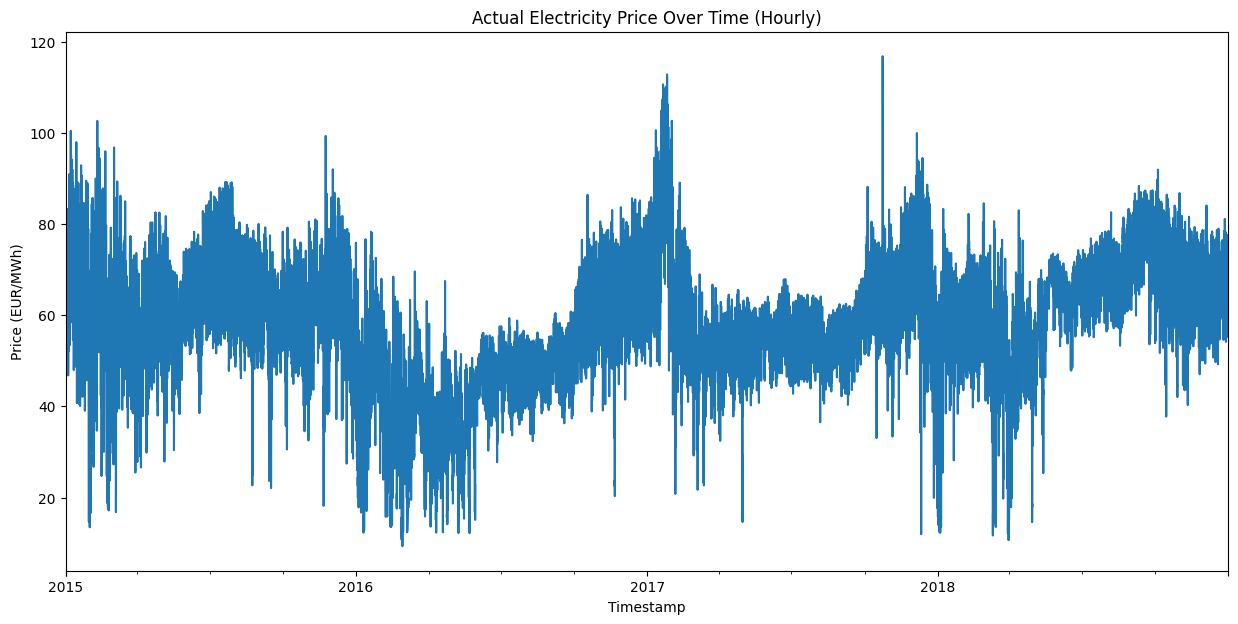

In [8]:
# Plot the 'price_actual'
print("Plotting Actual Electricity Price...")

df_cleaned['price_actual'].plot(figsize=(15, 7))
plt.title('Actual Electricity Price Over Time (Hourly)')
plt.ylabel('Price (EUR/MWh)')
plt.xlabel('Timestamp')
plt.show()

Plotting Daily and Monthly Average Prices...


C:\Users\SANJANA\AppData\Local\Temp\ipykernel_4612\347749847.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned['price_actual'].resample('M').mean().plot(ax=axes[1], title='Mean Monthly Electricity Price')


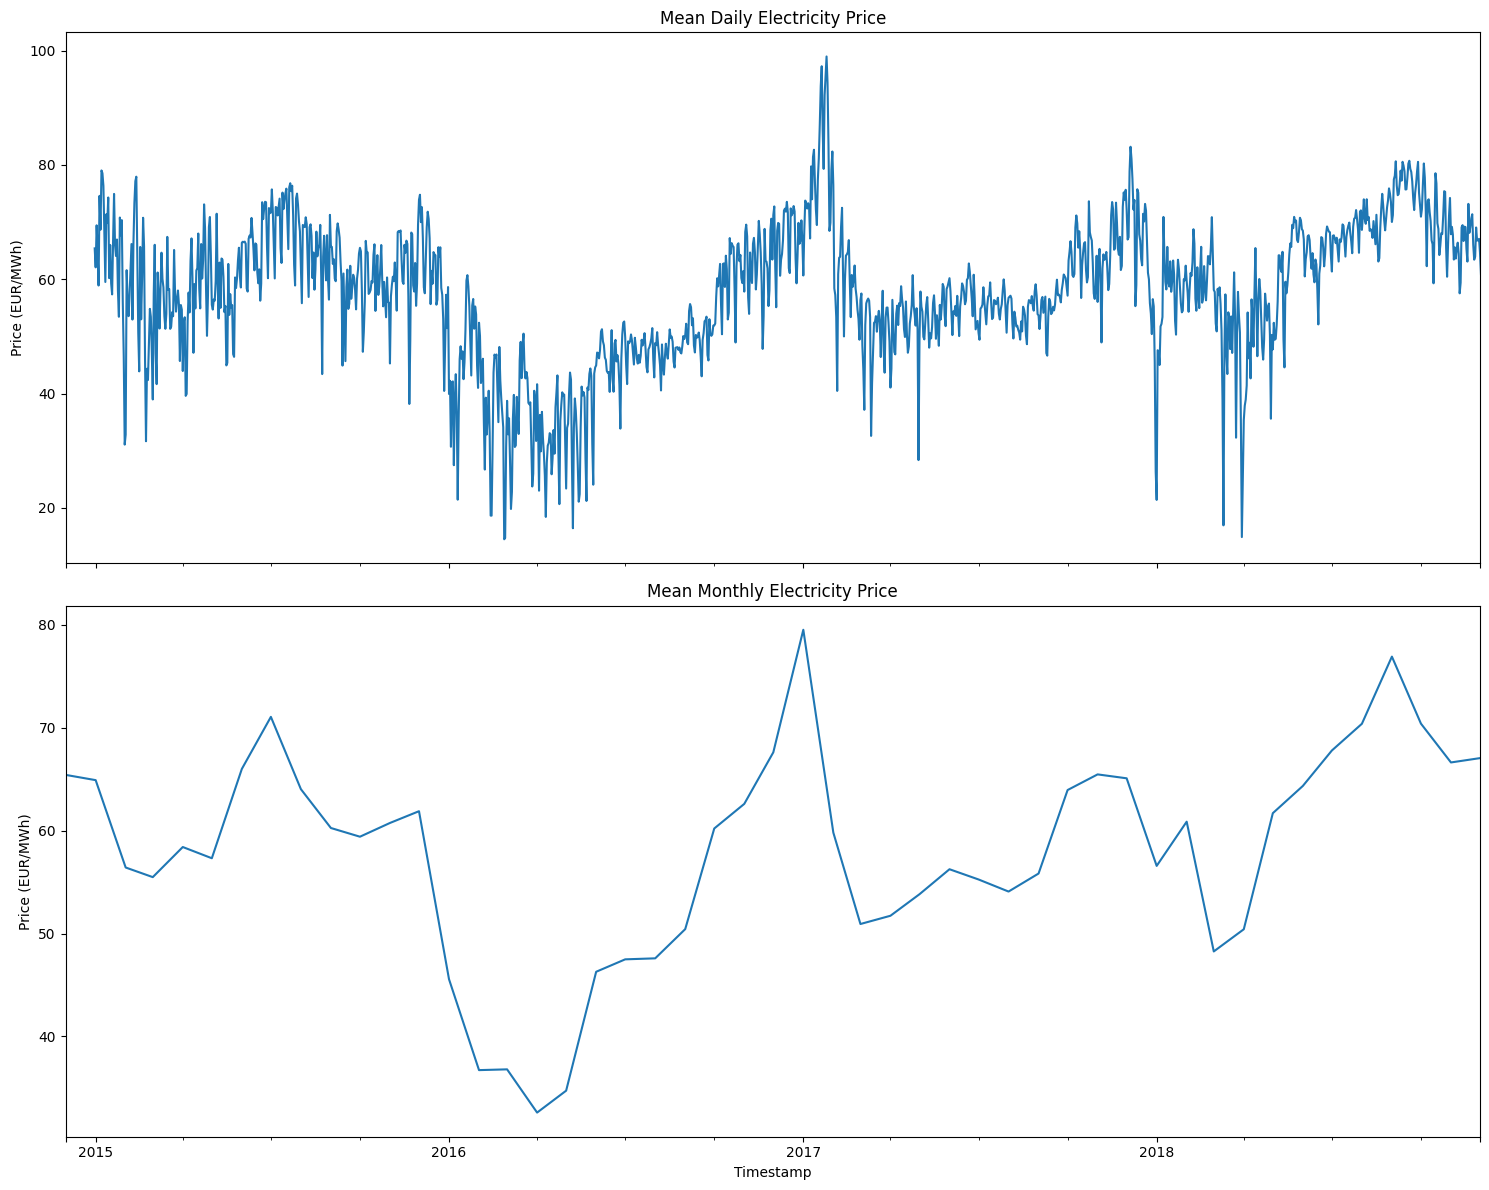

In [9]:
# Resample to Daily and Monthly averages to see clearer trends
print("Plotting Daily and Monthly Average Prices...")

fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Daily
df_cleaned['price_actual'].resample('D').mean().plot(ax=axes[0], title='Mean Daily Electricity Price')
axes[0].set_ylabel('Price (EUR/MWh)')

# Monthly
df_cleaned['price_actual'].resample('M').mean().plot(ax=axes[1], title='Mean Monthly Electricity Price')
axes[1].set_ylabel('Price (EUR/MWh)')

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()

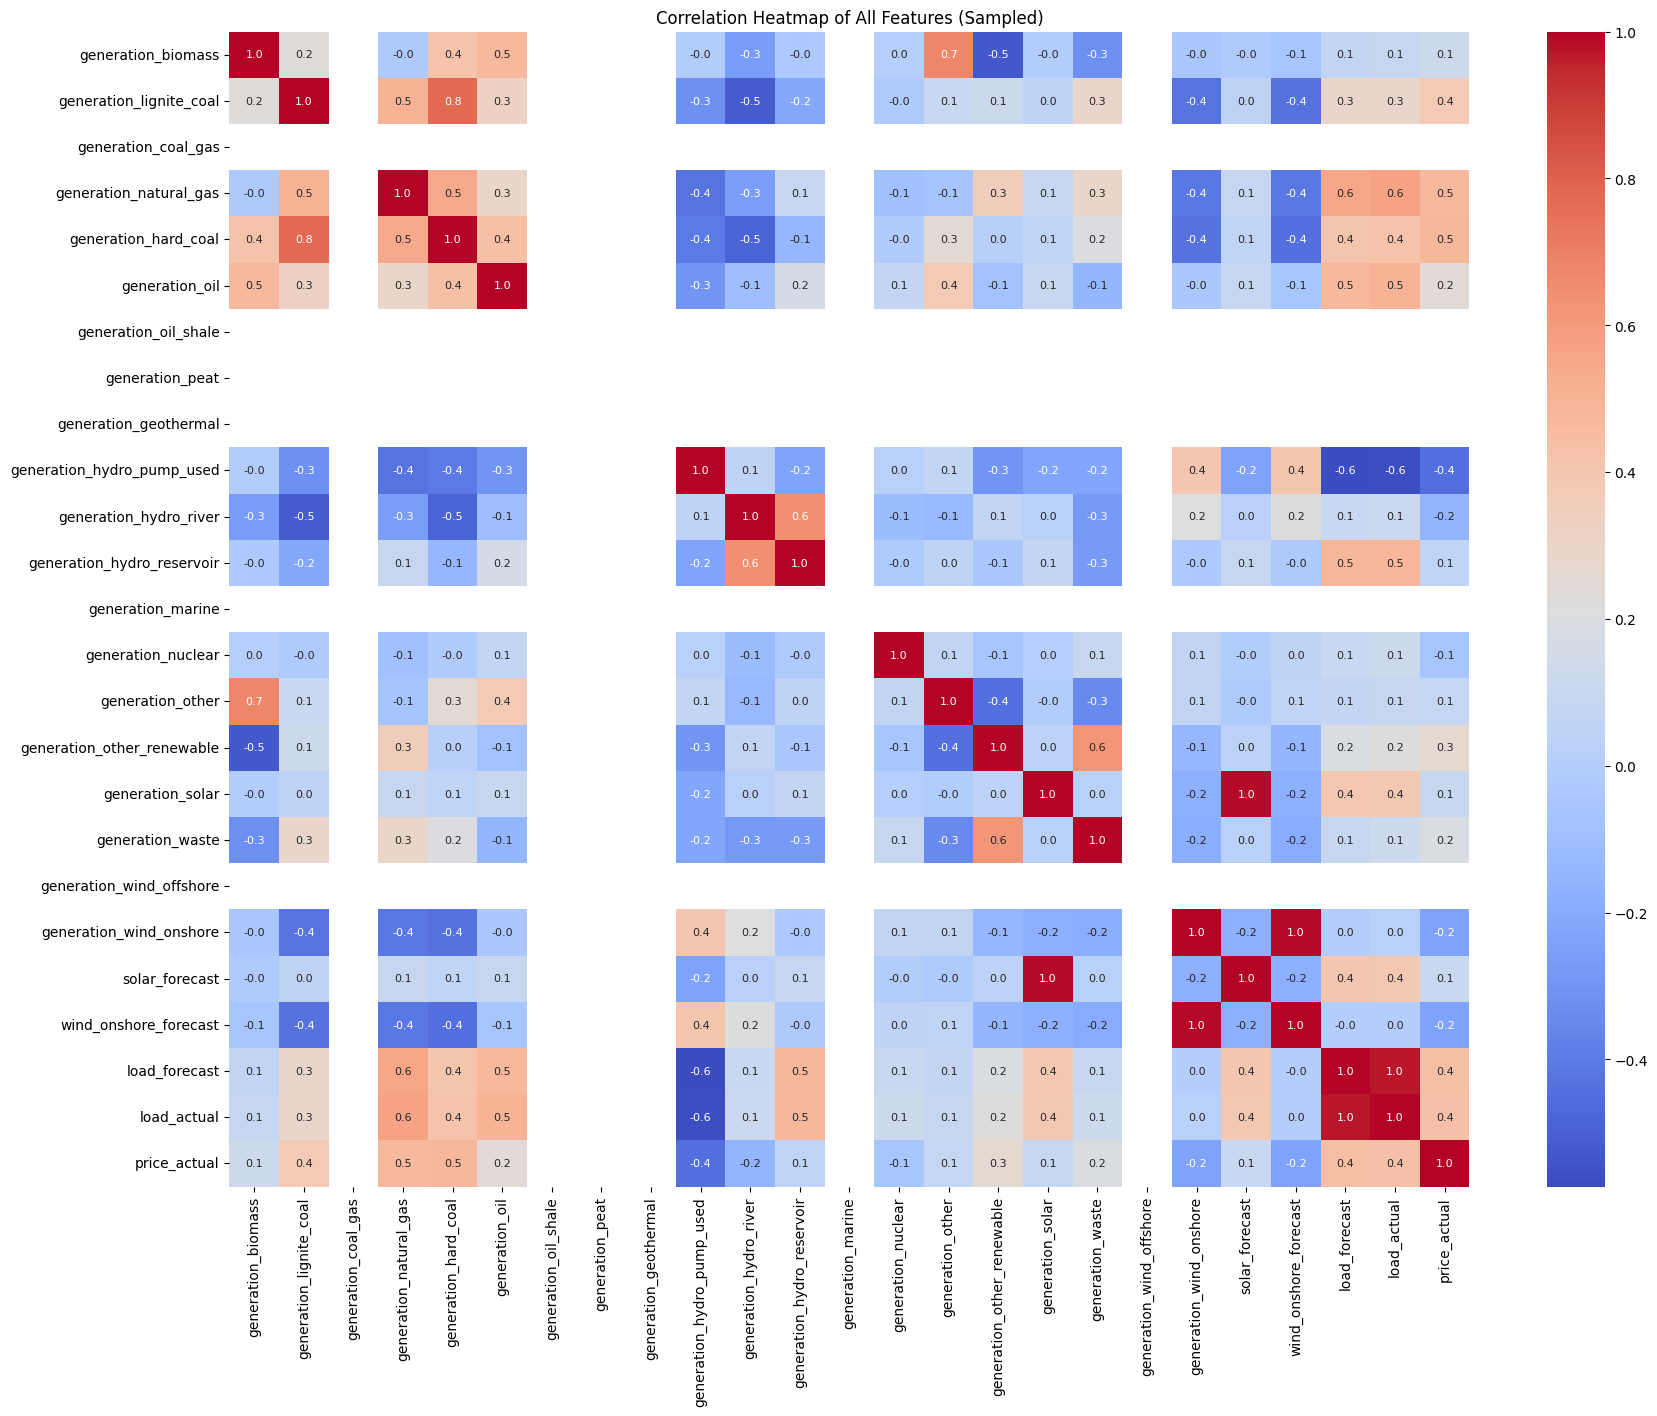

In [10]:
# Calculate the correlation matrix
# We'll just sample 10% of the data for this to run faster, as it's a big dataset
correlation_matrix = df_cleaned.sample(frac=0.1).corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})
plt.title('Correlation Heatmap of All Features (Sampled)')
plt.show()


In [11]:
# Make a new dataframe for our final processed data
df_processed = df_cleaned.copy()

# Extract new features from the index (the timestamp)
df_processed['hour'] = df_processed.index.hour
df_processed['day_of_week'] = df_processed.index.dayofweek  # 0=Monday, 6=Sunday
df_processed['month'] = df_processed.index.month
df_processed['quarter'] = df_processed.index.quarter
df_processed['day_of_year'] = df_processed.index.dayofyear

print("Created new time-based features:")
df_processed.head()

Created new time-based features:


,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_actual,hour,day_of_week,month,quarter,day_of_year
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,65.41,23,2,12,4,365
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,64.92,0,3,1,1,1
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,64.48,1,3,1,1,1
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,59.32,2,3,1,1,1
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,56.04,3,3,1,1,1


In [12]:
# This is the final dataset you will use for modeling.
print("Final processed dataset for Week 1 is complete!")
df_processed.head()

Final processed dataset for Week 1 is complete!


,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_actual,hour,day_of_week,month,quarter,day_of_year
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,65.41,23,2,12,4,365
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,64.92,0,3,1,1,1
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,64.48,1,3,1,1,1
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,59.32,2,3,1,1,1
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,56.04,3,3,1,1,1
